Використання методів штучного інтелекту для аналізу даних (регресія з набору даних Kaggle)

In [10]:
import pandas as pd

In [11]:
data = pd.read_csv("boston.csv") 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [13]:
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

In [14]:
corr_matrix = data.corr(numeric_only=True)

In [15]:
target_col = "SalePrice" if "SalePrice" in data.columns else "MEDV"

In [19]:
target_corr = corr_matrix[target_col].sort_values(ascending=False)
display(target_corr.head(10))


MEDV    1.000000
RM      0.695360
ZN      0.360445
B       0.333461
DIS     0.249929
CHAS    0.175260
AGE    -0.376955
RAD    -0.381626
CRIM   -0.388305
NOX    -0.427321
Name: MEDV, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop("MEDV", axis=1).select_dtypes(include=["number"])  # Тільки числові дані
y = data["MEDV"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [28]:
y_pred = model.predict(X_test)

In [29]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

R^2: 0.6687594935356317
MSE: 24.291119474973538


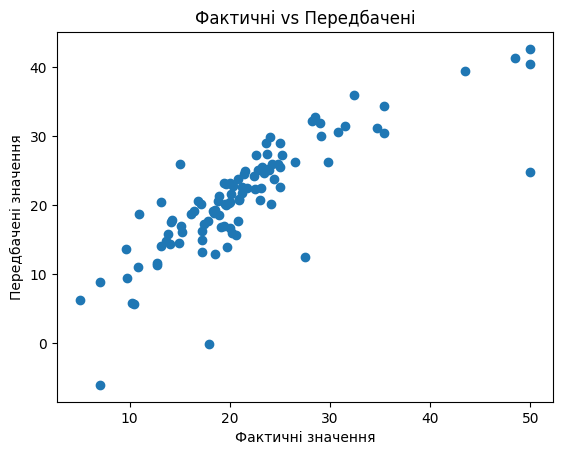

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Фактичні значення")
plt.ylabel("Передбачені значення")
plt.title("Фактичні vs Передбачені")
plt.show()

Додаткове завдання: Інші алгоритми регресії.

In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

In [32]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print(f"Ridge R^2: {r2_score(y_test, ridge_pred)}")

Ridge R^2: 0.6662221670168522


In [33]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
print(f"Lasso R^2: {r2_score(y_test, lasso_pred)}")

Lasso R^2: 0.6569712802223936


In [34]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print(f"Decision Tree R^2: {r2_score(y_test, tree_pred)}")

Decision Tree R^2: 0.885137272531848
